In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tipo=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_tipo

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A2 P4 BPI 2020,A2 P4 BPI 2020,Filter activities,Filter activities by sub-processes,2022-03-11 19:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
1,A2 P4 BPI 2020,A2 P4 BPI 2020,Group activities,Group activities by sub-processes,2022-03-11 20:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
2,A2 P4 BPI 2020,A2 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2022-03-11 21:24:15.966942,P4,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
3,A7 P4 BPI 2020,A7 P4 BPI 2020,Group activities,Group activities by role,2022-03-11 22:24:15.966942,P4,A7,2020,Academic,Manipulation,A72020,German Research Center for Artificial Intellig...
4,A7 P4 BPI 2020,A7 P4 BPI 2020,Calculate throughput,Calculate throughput,2022-03-11 23:24:15.966942,P4,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
950,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Group traces,Group traces by activities,2022-04-20 09:24:15.966942,P1-P2,A19,2020,Professional,Manipulation,A192020,Sberbank
951,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-04-20 10:24:15.966942,P1-P2,A19,2020,Professional,Calculate statistics,A192020,Sberbank
952,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate throughput,Calculate throughput,2022-04-20 11:24:15.966942,P1-P2,A19,2020,Professional,Analyze Time,A192020,Sberbank
953,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Represent temporal series,Represent temporal series of throughput,2022-04-20 12:24:15.966942,P1-P2,A19,2020,Professional,Representation,A192020,Sberbank


In [3]:
df_tipo['concept:name'].value_counts().mean()

17.053571428571427

In [4]:
df_tipo.groupby(['Type'])['concept:name'].value_counts()

Type                  concept:name                                                     
Analyze Time          Calculate cycle time                                                 152
                      Find bottlenecks                                                      63
                      Compare cycle time                                                    30
                      Calculate waiting time                                                27
                      Calculate throughput                                                  18
                      Calculate processing time                                             10
                      Comparative of throughput                                              2
                      Compare waiting time with processing time                              2
                      Analyze cycle time depending on the events                             1
                      Calculate intervals of time of the 

In [5]:
d = df_tipo.groupby(['Type', 'concept:name'])
for n, g in d:
    print(n, len(g['Variant'].unique()))

('Analyze Time', 'Analyze cycle time depending on the events') 1
('Analyze Time', 'Calculate cycle time') 12
('Analyze Time', 'Calculate intervals of time of the traces') 1
('Analyze Time', 'Calculate processing time') 1
('Analyze Time', 'Calculate throughput') 1
('Analyze Time', 'Calculate waiting time') 1
('Analyze Time', 'Comparative of throughput') 1
('Analyze Time', 'Compare cycle time') 1
('Analyze Time', 'Compare processing time') 1
('Analyze Time', 'Compare waiting time with processing time') 1
('Analyze Time', 'Find bottlenecks') 5
('Calculate statistics', 'Calculate average of activities per trace') 1
('Calculate statistics', 'Calculate frequency') 7
('Calculate statistics', 'Calculate number of elements') 7
('Calculate statistics', 'Calculate percentages') 4
('Calculate statistics', 'Calculate statistics') 4
('Identification', 'Identify activities') 4
('Identification', 'Identify attributes') 3
('Identification', 'Identify impact of bottlenecks by organizational unit') 1
('I

In [6]:
#most frequent operations
df_tipo['concept:name'].value_counts().head(16) 

Calculate cycle time            152
Filter traces                    86
Calculate number of elements     76
Find bottlenecks                 63
Group traces                     58
Calculate percentages            55
Represent process map            47
Calculate statistics             36
Represent bar charts             36
Identify attributes              34
Represent histograms             32
Compare cycle time               30
Calculate waiting time           27
Calculate frequency              25
Represent temporal series        25
Calculate throughput             18
Name: concept:name, dtype: int64

(array([5., 4., 3., 1., 1., 1., 0., 0., 0., 1.]),
 array([ 18. ,  31.4,  44.8,  58.2,  71.6,  85. ,  98.4, 111.8, 125.2,
        138.6, 152. ]),
 <a list of 10 Patch objects>)

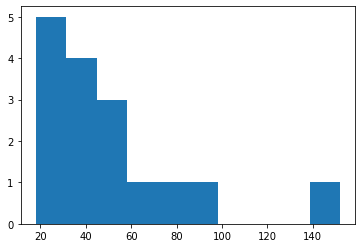

In [7]:
#histogram of most frequent operations
plt.hist(df_tipo['concept:name'].value_counts().head(16))

In [8]:
df_tipo['Variant'].unique()

array(['Filter activities by sub-processes',
       'Group activities by sub-processes',
       'Calculate cycle time for all pairs of events for each subset of traces',
       'Group activities by role', 'Calculate throughput',
       'Group activities by time', 'Calculate number of activities',
       'Represent scatterplot of cycle time and an attribute',
       'Represent process map with cycle time',
       'Calculate cycle time for all pairs of events for all traces',
       'Calculate cycle time of a fragment of the process for each subset of traces',
       'Represent process map with frequency',
       'Calculate cycle time of only a subset of pairs of events for a subset of traces',
       'Represent bar charts of cycle time',
       'Find activities as bottlenecks applying temporal performance criteria',
       'Filter variants depending on frequency',
       'Represent histograms of cycle time',
       'Preprocess the traces of the logs',
       'Calculate cycle time of the

### Análisis de variantes

In [9]:
v = df_tipo.groupby(by=['concept:name'])
variantes = v.apply(lambda x: len(x["Variant"].unique()))

(array([35.,  3.,  4.,  7.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.]),
 array([ 0.5       ,  1.46428571,  2.42857143,  3.39285714,  4.35714286,
         5.32142857,  6.28571429,  7.25      ,  8.21428571,  9.17857143,
        10.14285714, 11.10714286, 12.07142857, 13.03571429, 14.        ]),
 <a list of 14 Patch objects>)

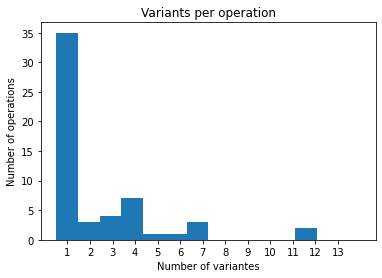

In [10]:
#histogram of number of variants per operation
fig, ax = plt.subplots()
# ax.axis("off")
plt.title('Variants per operation')
plt.xlabel('Number of variantes')
plt.ylabel('Number of operations')
plt.xticks(np.arange(1, 14, 1.0))
plt.hist(variantes, 14, range=[0.5, 14])


In [11]:
df_tipo['Variant'].value_counts().mean()

6.970802919708029